# k_means clustering
'''


for this method first of all we need to find the number of clusters and to find this number we have to use elbow method.
what is elbow methos?
elbow method is to draw the distances from one data point to the all data points and then draw these distances on a graph 
in decending order(the most distance will visualize first then 2nd and so on.). 

'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'F:\Math\2.Mine_Interest_\Data_Science_Course\Datasets\K_means clustering dataset unsupervised\Country-data.csv')
data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
X = data.iloc[:,5:7]
X


,income,inflation
0,1610,9.44
1,9930,4.49
2,12900,16.10
3,5900,22.40
4,19100,1.44
...,...,...
162,2950,2.62
163,16500,45.90
164,4490,12.10
165,4480,23.60


C:\Users\Muhammad Wasim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muhammad Wasim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Muhammad Wasim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muhammad Wasim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

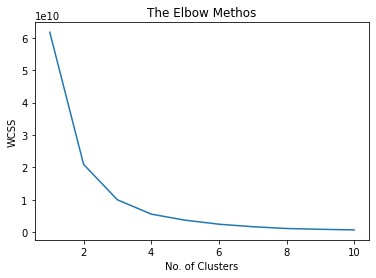

In [4]:
# using the elbow method to find the number of optimal clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i , init = 'k-means++')
    k_means.fit(X)
    wcss.append(k_means.inertia_)

plt.plot(range(1,11),wcss)
plt.title("The Elbow Methos")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

# the graph is behaviour is same after '4' so no of clusters == 4

In [5]:
# fitting k_means to the data set

k_means = KMeans(n_clusters = 4, init = 'k-means++')
k_means.fit(X)


C:\Users\Muhammad Wasim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muhammad Wasim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [6]:
X

,income,inflation
0,1610,9.44
1,9930,4.49
2,12900,16.10
3,5900,22.40
4,19100,1.44
...,...,...
162,2950,2.62
163,16500,45.90
164,4490,12.10
165,4480,23.60


In [7]:
y_kmeans = k_means.fit_predict(X)


C:\Users\Muhammad Wasim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muhammad Wasim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
y_kmeans 

array([0, 0, 2, 0, 2, 2, 0, 3, 3, 2, 2, 3, 0, 2, 2, 3, 0, 0, 0, 0, 0, 2,
       2, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 3, 2,
       3, 0, 0, 0, 0, 3, 0, 2, 0, 3, 3, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 3, 0, 0, 2, 2, 3, 2, 3, 0, 3, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 3, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 3, 3, 3, 2, 0, 0, 2, 0, 0, 0])

In [12]:
X['cluster'] = y_kmeans

In [14]:
X

,income,inflation,cluster
0,1610,9.44,0
1,9930,4.49,0
2,12900,16.10,2
3,5900,22.40,0
4,19100,1.44,2
...,...,...,...
162,2950,2.62,0
163,16500,45.90,2
164,4490,12.10,0
165,4480,23.60,0


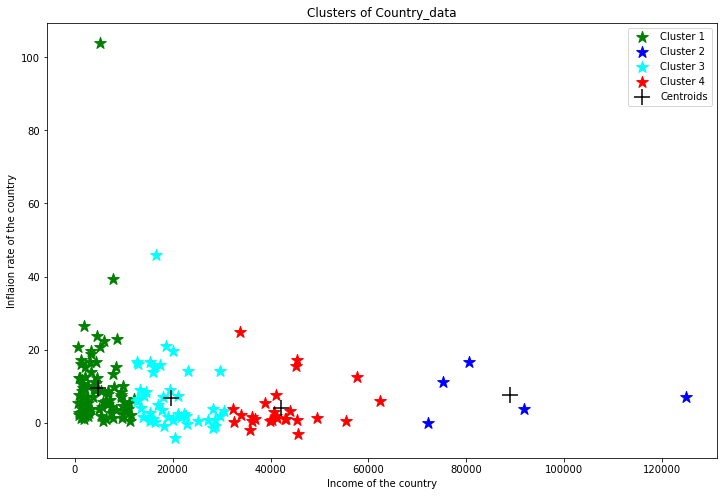

In [22]:
plt.figure(figsize=(12,8))

X1 = X[X.cluster==0] 
X2 = X[X.cluster==1] 
X3 = X[X.cluster==2] 
X4 = X[X.cluster==3]

plt.scatter(X1.income,X1.inflation, color ='green', s= 150 , label = 'Cluster 1' , marker = '*')
plt.scatter(X2.income,X2.inflation, color ='blue' ,s= 150, label = 'Cluster 2', marker = '*')
plt.scatter(X3.income,X3.inflation, color ='cyan' ,s= 150, label = 'Cluster 3', marker = '*')
plt.scatter(X4.income,X4.inflation, color ='red' ,s= 150, label = 'Cluster 4', marker = '*')
plt.scatter(k_means.cluster_centers_[:, 0] , k_means.cluster_centers_[:,1] , marker = '+' , s=250 , c= 'black', label = 'Centroids')

plt.title('Clusters of Country_data')
plt.xlabel('Income of the country')
plt.ylabel('Inflaion rate of the country')
plt.legend()
plt.show()
